In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pakistan-house-price-prediction/Entities.csv


# **Calling necessary requirements**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv('/kaggle/input/pakistan-house-price-prediction/Entities.csv')

In [4]:
df

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,For Sale,6,7/18/2019,Al Shahab Enterprises,Shahmir,26136.096
168442,168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,For Sale,3,7/18/2019,Al Shahab Enterprises,Shahmir,2178.008
168443,168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,For Sale,6,7/18/2019,Al Shahab Enterprises,Shahmir,26136.096
168444,168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,For Sale,3,7/18/2019,Al Shahab Enterprises,Shahmir,21235.578


# **Missing Values**

In [5]:
df.isnull().sum()

Unnamed: 0           0
property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Total_Area           0
dtype: int64

In [6]:
df=df.drop(['Unnamed: 0','property_id','location_id','page_url','location','date_added','agency','agent'],axis=1)

##  **Discussion:**
### For our initial experiment we are assuming that property_id and location_id doesn't carry much information and hence can be dropped. 'pageurl' is just for reference and hence can be dropped as well. 'location' is dropped as well because this information is already avaialable in longitude and latitude. 'agency' and 'agent' are dropped because they have about 25% missing values (although we could have imputed it)

In [7]:
df

,property_type,price,city,province_name,latitude,longitude,baths,purpose,bedrooms,Total_Area
0,Flat,10000000,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,1089.004
1,Flat,6900000,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,15246.056
2,House,16500000,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2178.008
3,House,43500000,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,10890.000
4,House,7000000,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2178.008
...,...,...,...,...,...,...,...,...,...,...
168441,House,26500000,Karachi,Sindh,25.029909,67.137192,0,For Sale,6,26136.096
168442,House,12500000,Karachi,Sindh,25.017951,67.136393,0,For Sale,3,2178.008
168443,House,27000000,Karachi,Sindh,25.015384,67.116330,0,For Sale,6,26136.096
168444,House,11000000,Karachi,Sindh,25.013265,67.120818,0,For Sale,3,21235.578


# **What to do with categorical columns?**
## One Hot Encode them? I avoid using OHE because I worry that we may lose some information by using this simple approach. In this experiment, we will ordinally enocode the sub-categories in our categorical columns.

## **Approach**
###   1) Take the categorical column and groupby it with the mean of the price column and see which sub-category has the the highest and lowest value.
###   2) Subcategory with the lowest impact is replaced with value 1, second lowest with 2 and so on.

In [8]:
df[['property_type',"price"]].groupby('property_type').mean()

,price
property_type,
Farm House,5.933984e+07
Flat,8.253729e+06
House,2.455157e+07
Lower Portion,1.345982e+06
Penthouse,1.683033e+07
Room,4.500444e+05
Upper Portion,2.119610e+06


In [9]:
ordinal_map = {'Room':1,
               'Lower Portion':2,
               'Upper Portion':3,
               'Flat':4,
               'Penthouse':5,
               'House':6,
               'Farm House':7
                       
}

df['property_type_new'] = df.property_type.map(ordinal_map)
df=df.drop(['property_type'],axis=1)
df.head()

,price,city,province_name,latitude,longitude,baths,purpose,bedrooms,Total_Area,property_type_new
0,10000000,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,1089.004,4
1,6900000,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,15246.056,4
2,16500000,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2178.008,6
3,43500000,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,10890.000,6
4,7000000,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2178.008,6


In [10]:
df[['city',"price"]].groupby('city').mean()

,price
city,
Faisalabad,7.827574e+06
Islamabad,1.339833e+07
Karachi,1.983883e+07
Lahore,2.528863e+07
Rawalpindi,8.576443e+06


In [11]:
ordinal_map = {'Faisalabad':1,
               'Rawalpindi':2,
               'Islamabad':3,
               'Karachi':4,
               'Lahore':5
                       
}

df['city_new'] = df.city.map(ordinal_map)
df=df.drop(['city'],axis=1)
df.head()

,price,province_name,latitude,longitude,baths,purpose,bedrooms,Total_Area,property_type_new,city_new
0,10000000,Islamabad Capital,33.679890,73.012640,2,For Sale,2,1089.004,4,3
1,6900000,Islamabad Capital,33.700993,72.971492,3,For Sale,3,15246.056,4,3
2,16500000,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2178.008,6,3
3,43500000,Islamabad Capital,33.707573,73.151199,4,For Sale,4,10890.000,6,3
4,7000000,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2178.008,6,3


In [12]:
df[['province_name',"price"]].groupby('province_name').mean()

,price
province_name,
Islamabad Capital,1.339833e+07
Punjab,1.830545e+07
Sindh,1.983883e+07


In [13]:
ordinal_map = {'Islamabad Capital':1,
               'Punjab':2,
               'Sindh':3
                       
}

df['province_name_new'] = df.province_name.map(ordinal_map)
df=df.drop(['province_name'],axis=1)
df.head()

,price,latitude,longitude,baths,purpose,bedrooms,Total_Area,property_type_new,city_new,province_name_new
0,10000000,33.679890,73.012640,2,For Sale,2,1089.004,4,3,1
1,6900000,33.700993,72.971492,3,For Sale,3,15246.056,4,3,1
2,16500000,33.631486,72.926559,6,For Sale,5,2178.008,6,3,1
3,43500000,33.707573,73.151199,4,For Sale,4,10890.000,6,3,1
4,7000000,33.492591,73.301339,3,For Sale,3,2178.008,6,3,1


In [14]:
df[['purpose',"price"]].groupby('purpose').mean()

,price
purpose,
For Rent,9.488438e+04
For Sale,2.476513e+07


In [15]:
ordinal_map = {'For Rent':1,
               'For Sale':2,
                       
}

df['purpose_new'] = df.purpose.map(ordinal_map)
df=df.drop(['purpose'],axis=1)
df.head()

,price,latitude,longitude,baths,bedrooms,Total_Area,property_type_new,city_new,province_name_new,purpose_new
0,10000000,33.679890,73.012640,2,2,1089.004,4,3,1,2
1,6900000,33.700993,72.971492,3,3,15246.056,4,3,1,2
2,16500000,33.631486,72.926559,6,5,2178.008,6,3,1,2
3,43500000,33.707573,73.151199,4,4,10890.000,6,3,1,2
4,7000000,33.492591,73.301339,3,3,2178.008,6,3,1,2


In [16]:
df.head()

,price,latitude,longitude,baths,bedrooms,Total_Area,property_type_new,city_new,province_name_new,purpose_new
0,10000000,33.679890,73.012640,2,2,1089.004,4,3,1,2
1,6900000,33.700993,72.971492,3,3,15246.056,4,3,1,2
2,16500000,33.631486,72.926559,6,5,2178.008,6,3,1,2
3,43500000,33.707573,73.151199,4,4,10890.000,6,3,1,2
4,7000000,33.492591,73.301339,3,3,2178.008,6,3,1,2


# **Feature Selection**
## Lets see the correlation heatmap of the features and see if this helps in feature selection.

<AxesSubplot:>

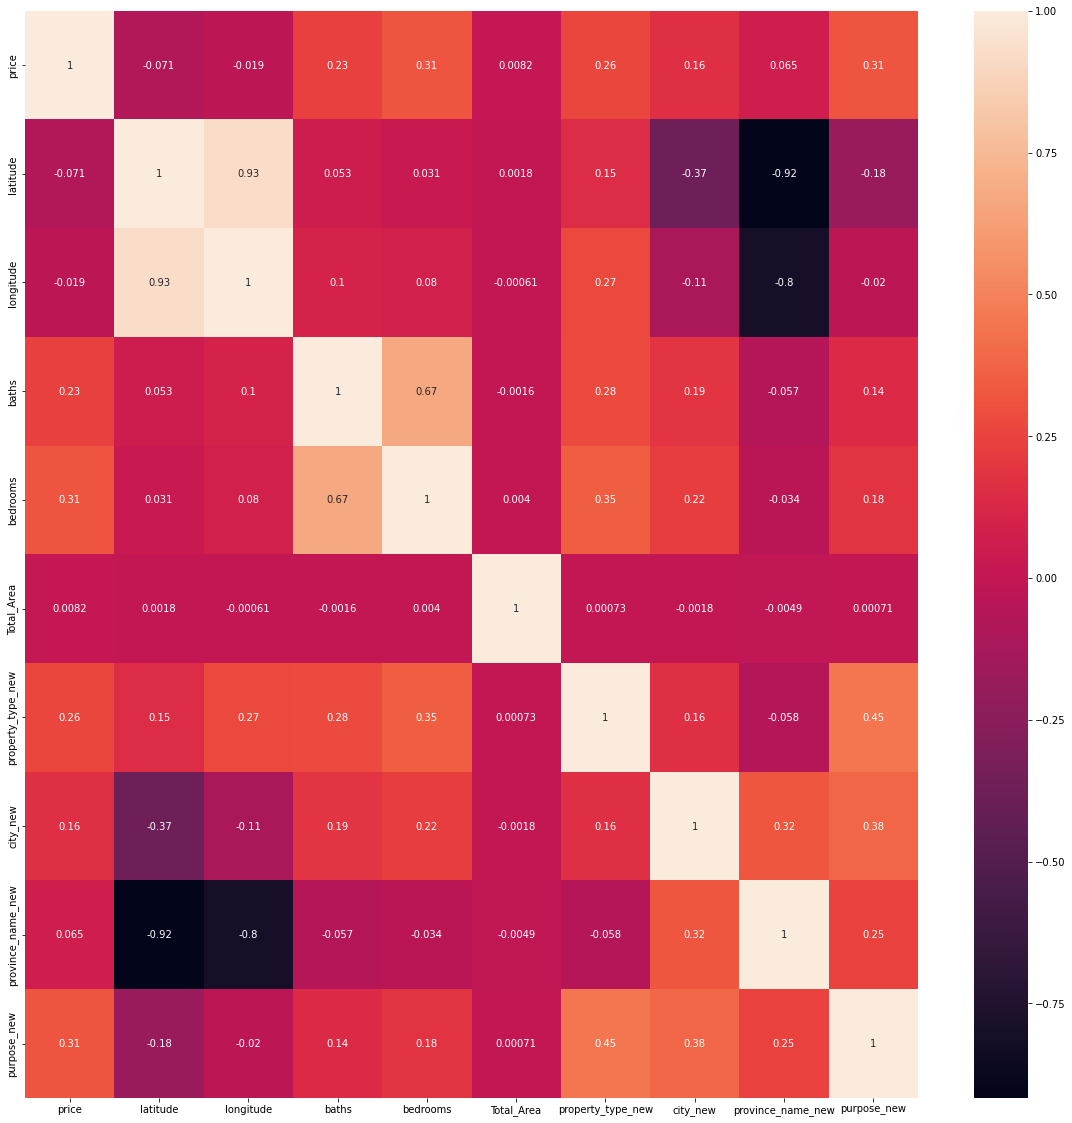

In [17]:
plt.figure(figsize=(20,20))
cor=df.corr()
sns.heatmap(cor,annot=True)

##  **Discussion**
## Seems like 'latitude', 'longitude', 'Total_Area' and 'province_name_new' are least correlated with the output and can be dropped (But lets just select them for the sake of simplicity)

# **Separating dependent and independent features**

In [18]:
X=df.drop(['price'],axis=1)
y=pd.DataFrame(df['price'])

In [19]:
X.head()

,latitude,longitude,baths,bedrooms,Total_Area,property_type_new,city_new,province_name_new,purpose_new
0,33.679890,73.012640,2,2,1089.004,4,3,1,2
1,33.700993,72.971492,3,3,15246.056,4,3,1,2
2,33.631486,72.926559,6,5,2178.008,6,3,1,2
3,33.707573,73.151199,4,4,10890.000,6,3,1,2
4,33.492591,73.301339,3,3,2178.008,6,3,1,2


In [20]:
y.head()

,price
0,10000000
1,6900000
2,16500000
3,43500000
4,7000000


# **Fitting and Cross-Validating the model**

In [21]:
LR=LinearRegression()
LR.fit(X,y)

LinearRegression()

In [22]:
scores = cross_val_score(LR, X, y, cv=10, scoring='neg_mean_squared_error')
scores=-1*scores

In [23]:
np.sqrt((scores))

array([38275768.51568794, 31489121.4295151 , 34457860.14645815,
       35773024.32131822, 35918053.58211891, 35131180.76550616,
       29845055.42847659, 26919647.53542475, 26448398.30515372,
       24101743.13197604])

In [24]:
(np.sqrt((scores))).mean()

31835985.316163562

# **Reason for such high error**

## If you look closely in the dataset you will find that no feature is highly correlated with the dependent feature.

# **Way Forward**

# 1) Remove ouliers
## While removing outliers it is important to note that outliers for prices in 'rent' houses will have different bounds as compared outliers of 'for sale' houses.
# 2) Feature Engineering
## None of the features is highly correlated with the output in this approach. Make new features or maybe reconsider the dropped feature to improve the results.
# 3) Try Different Algorithms
## To find which algorithm works best for this problem?
# 4) Hyper Parameter Tuning
## To further improve the score without overfitting.
# 5) Stacking
## Maybe the combination of best performing algorithms is better than one.